<a href="https://colab.research.google.com/github/deeps-kkk/Projects/blob/main/Netflix_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info() # datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.info() # datatype of each colum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#shape of dataset
df.shape

(8807, 12)

In [ ]:
#description of numerical attribute
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
#description of categorical attribute
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


# **Data Handling and Processing**

In [ ]:
# Number of missing values in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# fill unknown in place of missing values
for i in df.columns:
    if df[i].dtype == 'object':  # Access column using df[i] and check dtype
        df[i].fillna('Unknown_'+i, inplace=True)
    else:
      df[i].fillna(0,inplace=True)


In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown_director,Unknown_cast,Unknown_country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Unpacking values from cast
df['cast']=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df = df.explode('cast', ignore_index=True)

In [ ]:
df.cast.value_counts()

cast
Unknown_cast               825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: count, Length: 36440, dtype: int64

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown_director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown_director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
#Unpacking values from listed_in
df['listed_in']=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df = df.explode('listed_in', ignore_index=True)

In [ ]:
df.listed_in.value_counts()

listed_in
Dramas                          20778
International Movies            20669
Comedies                        15197
International TV Shows          11319
Action & Adventure               8060
TV Dramas                        7473
Independent Movies               6300
Children & Family Movies         5634
Romantic Movies                  5221
Thrillers                        4821
TV Comedies                      4482
Crime TV Shows                   4006
Kids' TV                         3252
Horror Movies                    3069
Romantic TV Shows                2903
Music & Musicals                 2434
Sci-Fi & Fantasy                 2294
Anime Series                     2126
Spanish-Language TV Shows        1825
TV Action & Adventure            1788
Documentaries                    1641
British TV Shows                 1424
Sports Movies                    1194
TV Mysteries                     1088
Korean TV Shows                  1062
Classic Movies                   1029
TV

In [ ]:
#Unpacking values from directo
df['director']=df['director'].apply(lambda x: str(x).split(',')).tolist()
df = df.explode('director', ignore_index=True)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df.director.value_counts()

director
Unknown_director       44621
Cathy Garcia-Molina      356
Youssef Chahine          288
Martin Scorsese          273
David Dhawan             270
                       ...  
Phil Burgers               1
August Jakobsson           1
Jedd Wider                 1
 Todd Wider                1
Kirsten Johnson            1
Name: count, Length: 5121, dtype: int64

In [ ]:
#Convert date_added attribute to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract release week from the 'date_added' column
df['release_week'] = df['date_added'].dt.isocalendar().week

# Extract release month
df['release_month'] = df['date_added'].dt.month_name()

# Define the order of months
month_order = [
'January', 'February', 'March', 'April', 'May', 'June',
'July', 'August', 'September', 'October', 'November', 'December'
]
# Set the order of the 'release_month' column
df['release_month'] = pd.Categorical(df['release_month'], categories=month_order, ordered=True)

# **Data Visualisation**

<ipython-input-389-3a76d5a50f1c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df,palette='Set2')


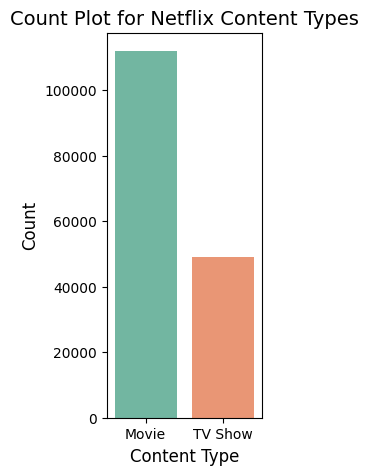

In [ ]:
#Graphical analysis of count of type
plt.figure(figsize=(2, 5))
sns.countplot(x='type', data=df,palette='Set2')
plt.title('Count Plot for Netflix Content Types',fontsize=14)
plt.xlabel('Content Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


It is evident from the data that the number of movies surpasses the count of TV shows in the dataset.

# Comparison of tv shows vs. movies.


 Top 10 countries with maximum number of movies created

<ipython-input-390-fc1573f7f0fa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_movie_countries.values, y=top_10_movie_countries.index, palette='viridis')


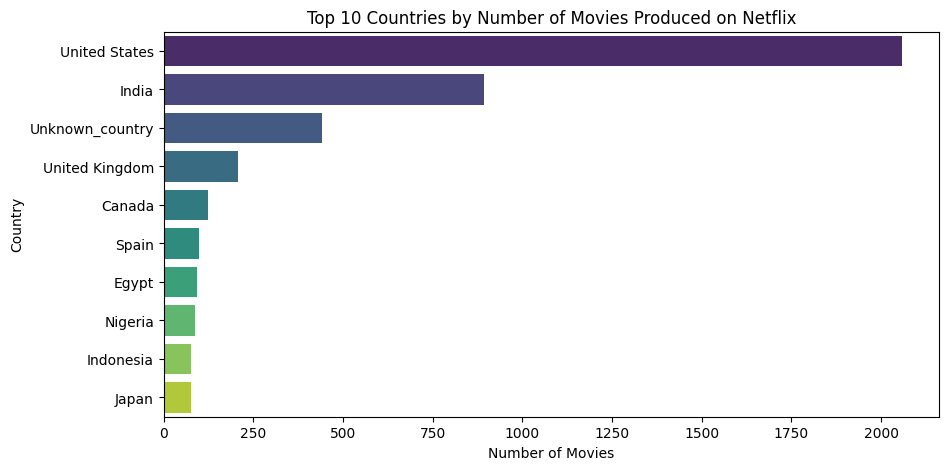

In [ ]:
# Filter the DataFrame for Movies
movies_df = df[(df['type'] == 'Movie')]
# Group by 'country' and count the unique movie titles
movies_by_country = movies_df.groupby('country')['title'].nunique().sort_values(ascending=False)
# Select the top 10 countries
top_10_movie_countries = movies_by_country.head(10)
# Plotting the results
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_movie_countries.values, y=top_10_movie_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Movies Produced on Netflix')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.show()




Evidently, the United States emerges as a major player in the global film industry, featuring prominently with a considerable presence of movies.
India closely follows, making a substantial contribution to the dataset. Additionally, the United Kingdom, Canada, Spain, Egypt, Nigeria,
Indonesia, Turkey, and Japan showcase distinctive cinematic contributions, indicating a diverse global landscape in filmmaking. This
distribution underscores the varied and noteworthy roles played by different nations in shaping the overall cinematic landscape.

 Top 10 countries with maximum number of TV shows created


<ipython-input-391-b433f554d1fa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_tv_show_countries.values, y=top_10_tv_show_countries.index, palette='viridis')


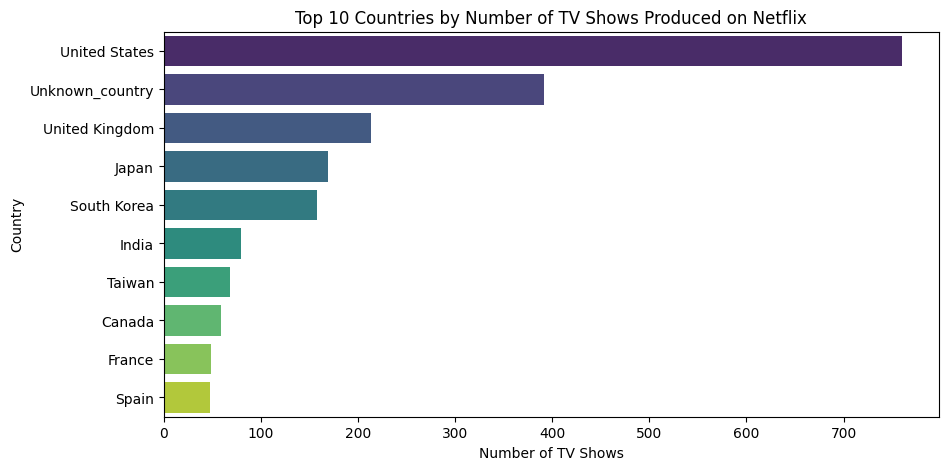

In [ ]:
# Filter the DataFrame for TV-Shows
tv_shows_df = df[(df['type'] == 'TV Show')]
# Group by 'country' and count the unique TV show titles
tv_shows_by_country = tv_shows_df.groupby('country')['title'].nunique().sort_values(ascending=False)
# Select the top 10 countries
top_10_tv_show_countries = tv_shows_by_country.head(10)
# Plotting the results
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_tv_show_countries.values, y=top_10_tv_show_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of TV Shows Produced on Netflix')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')
plt.show()

In the television production sphere, the United States takes a leading position, showcasing a substantial presence. Following closely is the
United Kingdom, contributing significantly to the realm of TV shows. Japan, South Korea, and India also play noteworthy roles, each presenting
a considerable footprint in television content. Additionally, Taiwan, Canada, France, Australia, and Spain contribute to the global television
landscape, offering distinctive and diverse shows. This collective array of contributions emphasizes the varied and influential roles played by
different nations in shaping the global narrative of television programming.


The best week to release the Tv-show .

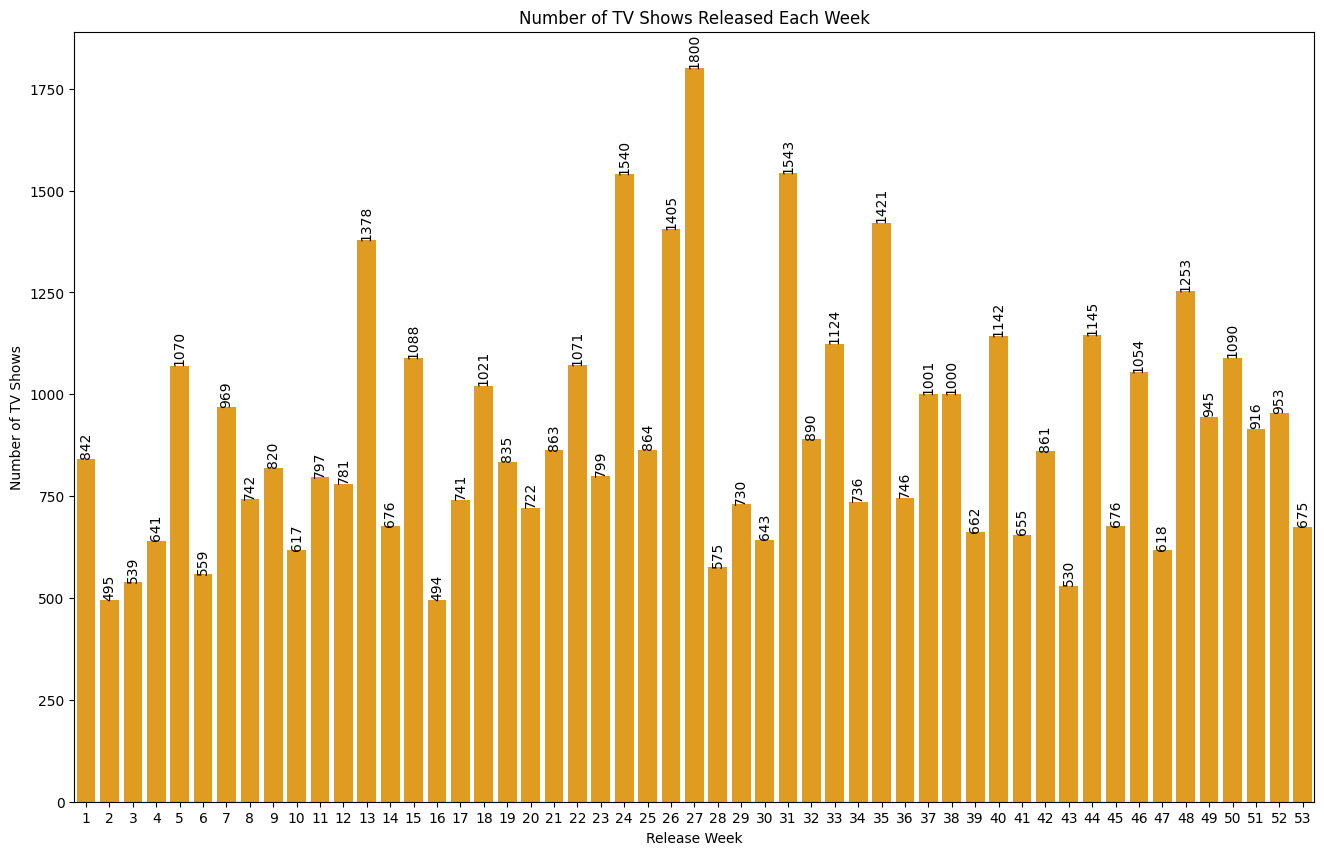

In [ ]:
# Filter for TV shows
tv_shows_df = df[df['type'] == 'TV Show']
# Group by release week and count the number of TV shows released
tv_shows_by_week = tv_shows_df.groupby('release_week')['title'].count()
# Plotting the results for TV shows
plt.figure(figsize=(16, 10))
tv_shows_plot = sns.barplot(x=tv_shows_by_week.index, y=tv_shows_by_week.values, color='orange')
plt.title('Number of TV Shows Released Each Week')
plt.xlabel('Release Week')
plt.ylabel('Number of TV Shows')
# Display values on top of the bars
for index, value in enumerate(tv_shows_by_week):
  tv_shows_plot.text(index, value, str(value), ha='center', va='bottom',rotation=90)
plt.show()

The best week to release the Movie-show

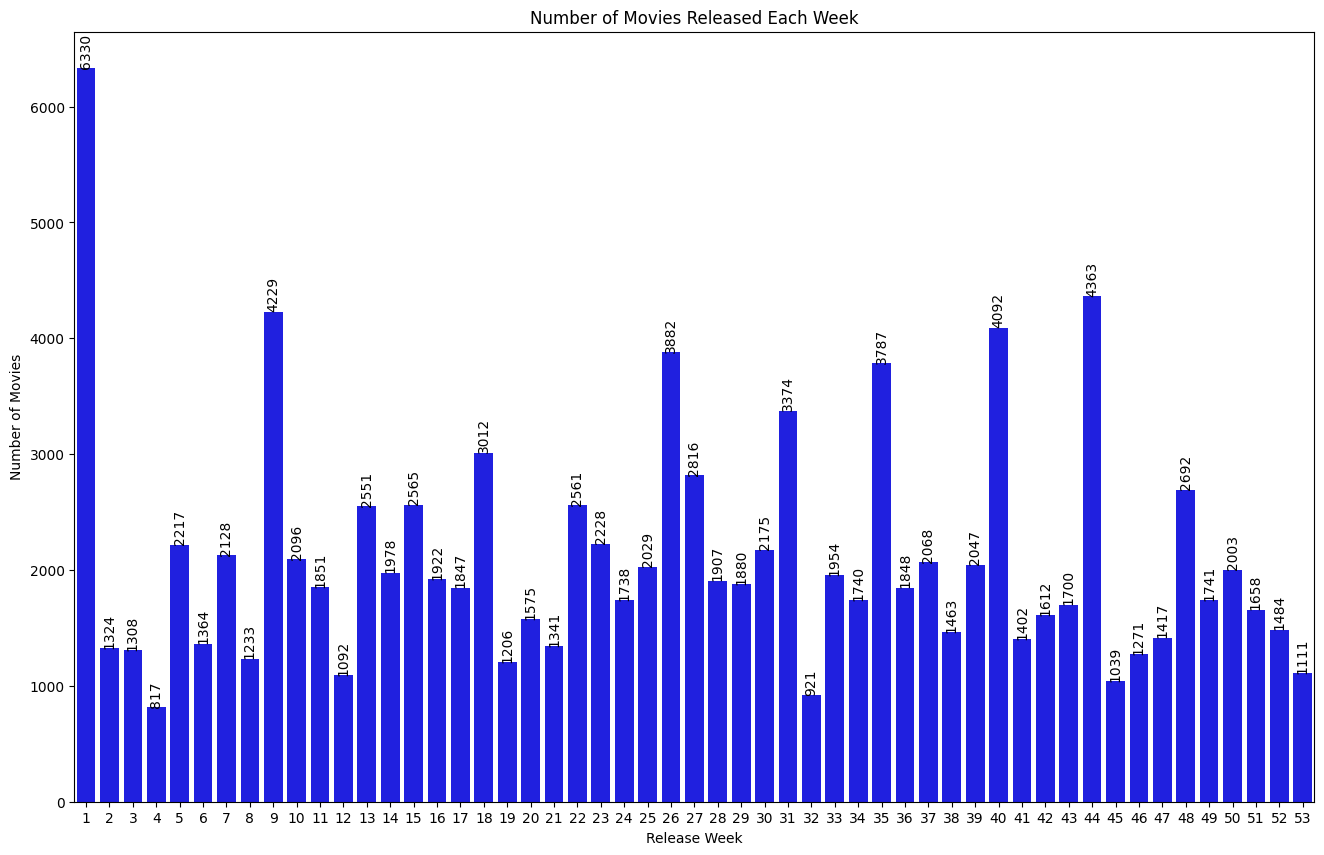

In [ ]:
# Filter for movies
movies_df = df[df['type'] == 'Movie']
# Group by release week and count the number of  movies released
movies_by_week = movies_df.groupby('release_week')['title'].count()
# Plotting the results for movies
plt.figure(figsize=(16, 10))
movies_plot = sns.barplot(x=movies_by_week.index, y=movies_by_week.values, color='blue')
plt.title('Number of Movies Released Each Week')
plt.xlabel('Release Week')
plt.ylabel('Number of Movies')
# Display values on top of the bars
for index, value in enumerate(movies_by_week):
  movies_plot.text(index, value, str(value), ha='center', va='bottom',rotation=90)
plt.show()

According to the graphical representation, it is discerned that the optimal week for releasing TV shows is in the 27th week, while for movies, the
most favorable time is during the first week.


The best month to release the Tv-show

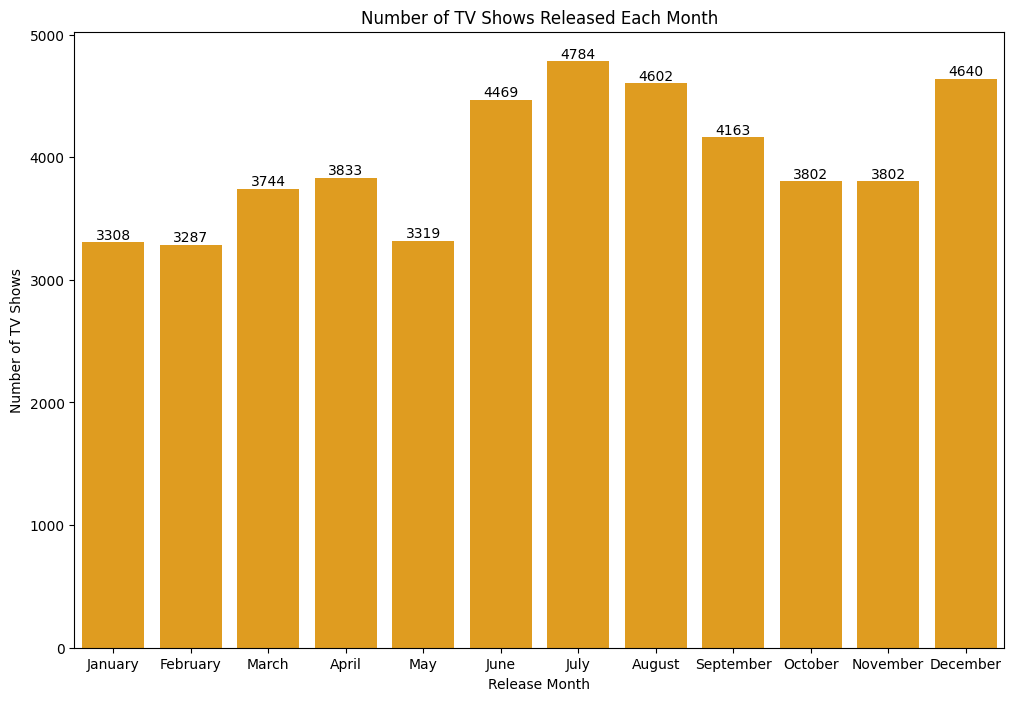

In [ ]:
# Filter for TV shows
tv_shows_df = df[df['type'] == 'TV Show']
# Group by release month and count the number of TV shows released
tv_shows_by_month = tv_shows_df.groupby('release_month')['title'].count()
# Plotting the results for TV shows
plt.figure(figsize=(12, 8))
tv_shows_plot = sns.barplot(x=tv_shows_by_month.index, y=tv_shows_by_month.values, color='orange')
plt.title('Number of TV Shows Released Each Month')
plt.xlabel('Release Month')
plt.ylabel('Number of TV Shows')
# Display values on top of the bars
for index, value in enumerate(tv_shows_by_month):
  tv_shows_plot.text(index, value, str(value), ha='center', va='bottom')
plt.show()


The best month to release the movie.

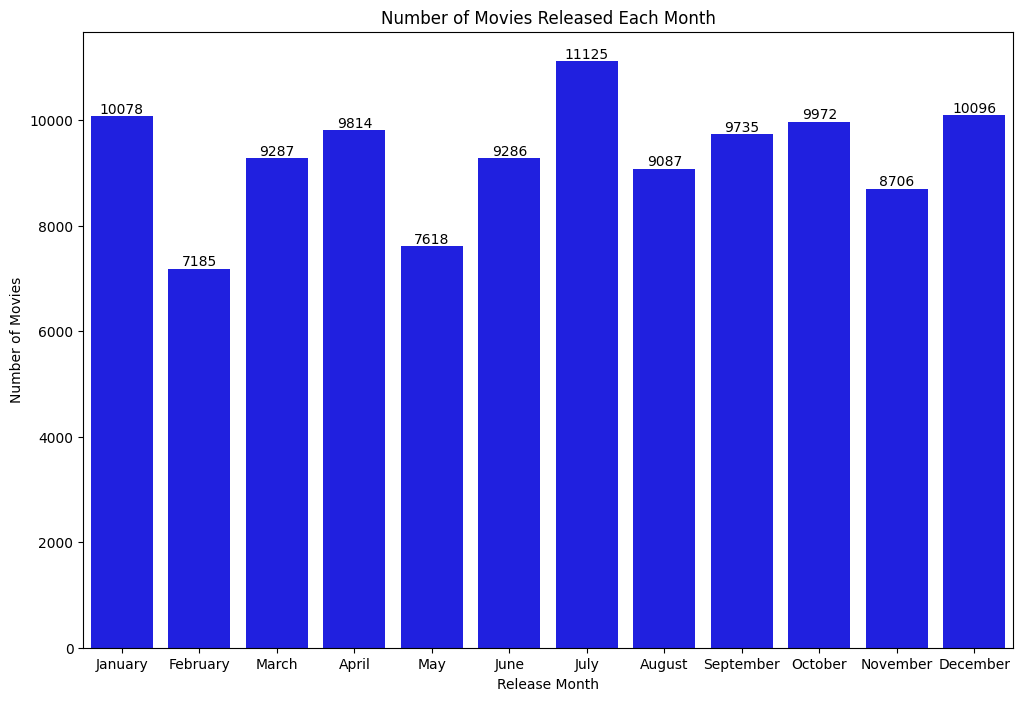

In [ ]:
# Filter for movies
movies_df = df[df['type'] == 'Movie']
# Group by release month and count the number of movies released
movies_by_month = movies_df.groupby('release_month')['title'].count()
# Plotting the results for movies
plt.figure(figsize=(12, 8))
movies_plot = sns.barplot(x=movies_by_month.index, y=movies_by_month.values, color='blue')
plt.title('Number of Movies Released Each Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
# Display values on top of the bars
for index, value in enumerate(movies_by_month):
  movies_plot.text(index, value, str(value), ha='center', va='bottom')
plt.show()


As indicated by the graphical representation, it is evident that the most favorable month for releasing TV shows is December, whereas for
movies, the optimal month is July.

#Analysis of actors/directors of different types of shows/movies.

The top 10 director actor combination who have appeared in most TV shows


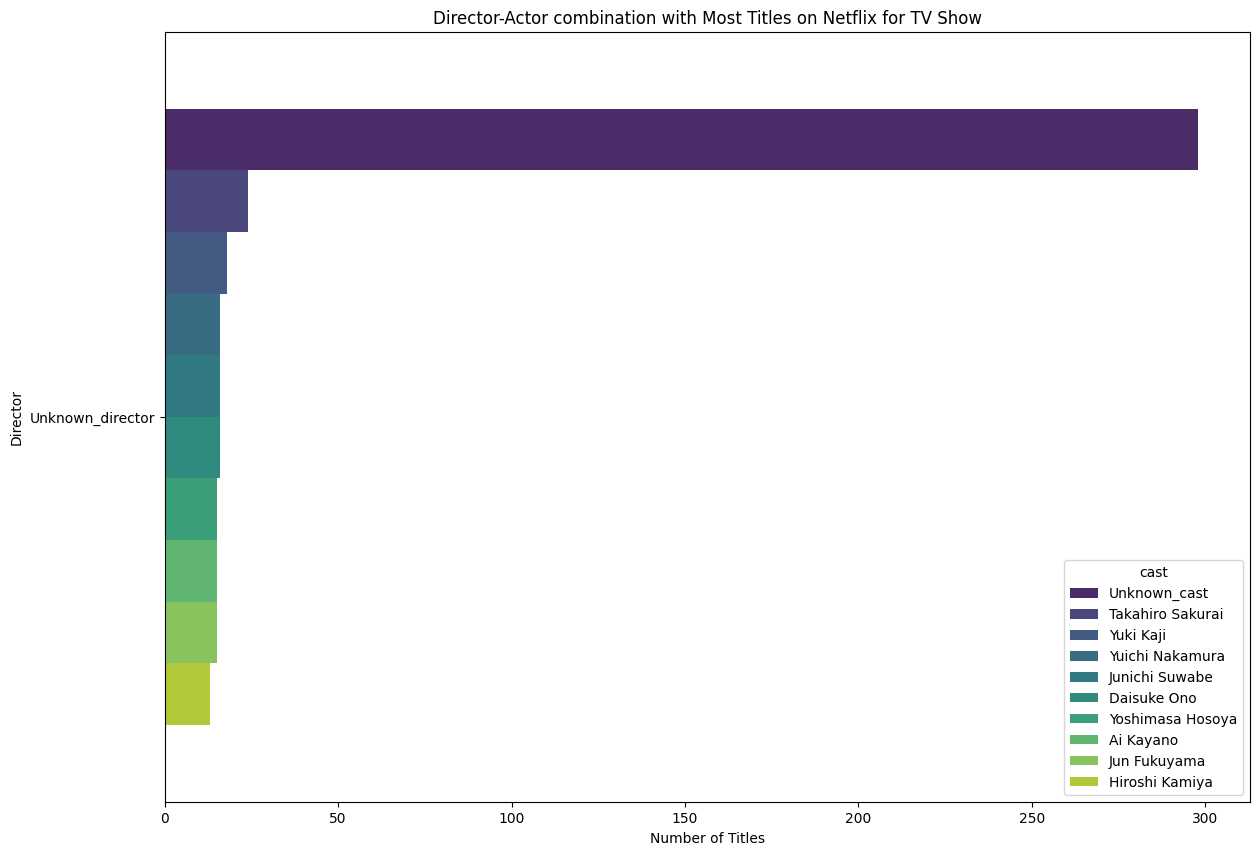

In [ ]:
directors_df = df[df['type']=='TV Show'].groupby(['director','cast'])['title'].nunique().reset_index(name = 'no_titles')
# Selecting the top 10 directors with the most titles
top_10_directors = directors_df.sort_values(by='no_titles', ascending=False).head(10)
# Creating the clustered bar plot
plt.figure(figsize=(14, 10))
sns.barplot(x='no_titles', y='director',hue='cast', data=top_10_directors, palette='viridis')
plt.title('Director-Actor combination with Most Titles on Netflix for TV Show')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

The most prominent collaboration features an unknown director working with unknown_actor. This unknown director leads the list, showcasing versatility by collaborating with diverse casts.

The top 10 director actor combination who have appeared in most Movies



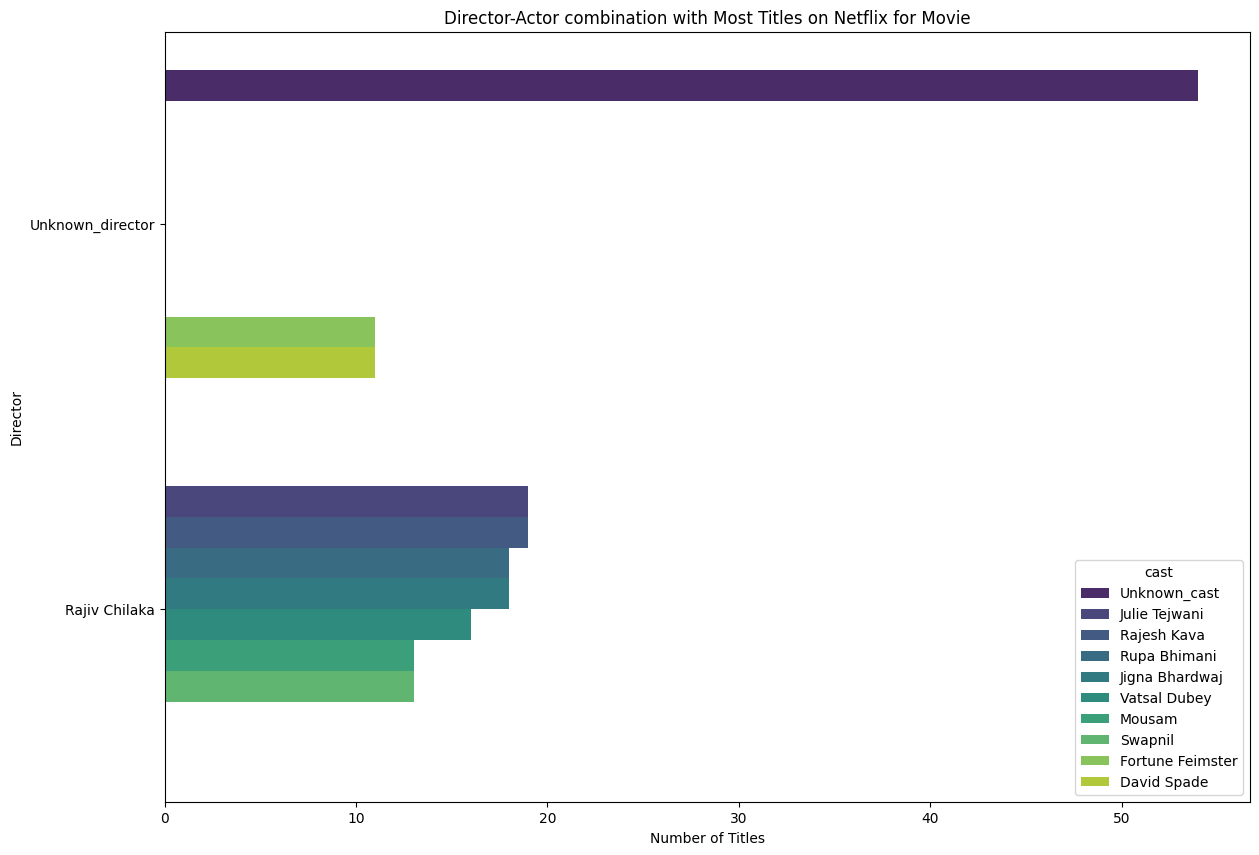

In [ ]:
directors_df = df[df['type']=='Movie'].groupby(['director','cast'])['title'].nunique().reset_index(name = 'no_titles')
# Selecting the top 10 directors with the most titles
top_10_directors = directors_df.sort_values(by='no_titles', ascending=False).head(10)
# Creating the clustered bar plot
plt.figure(figsize=(14, 10))
sns.barplot(x='no_titles', y='director',hue='cast', data=top_10_directors, palette='viridis')
plt.title('Director-Actor combination with Most Titles on Netflix for Movie')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

At the forefront, there's a collaboration involving an unidentified director and an unknown actor. Additionally, director Rajiv Chilaka secures a spot among the top ranks, partnering with various casts.

#Which genre movies are more popular or produced more


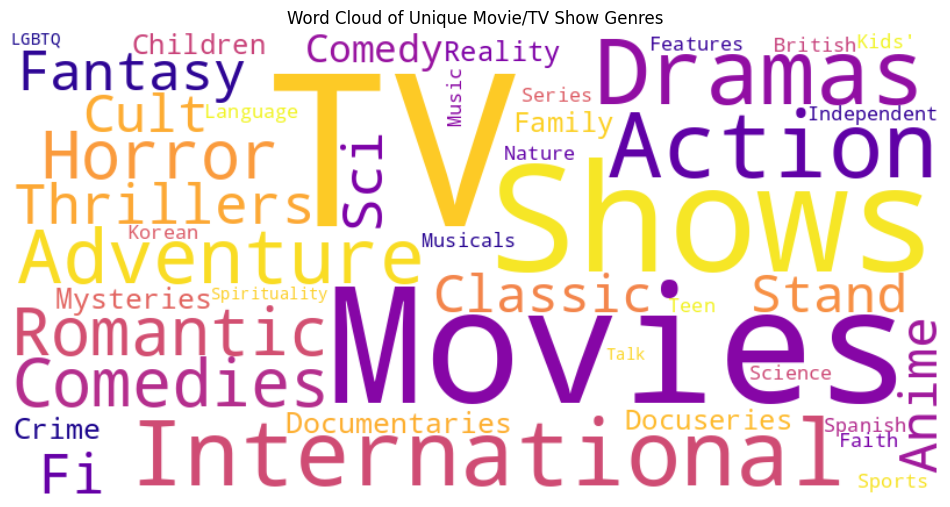

In [ ]:
from wordcloud import WordCloud
#Get all genre names
genres_data = df['listed_in'].dropna()
# Get unique genres
unique_genres = genres_data.unique()
# Combine all unique genres into a single string
all_genres = ' '.join(unique_genres)
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma', collocations=False)
# Generate word cloud from unique genres
wordcloud = wordcloud.generate_from_text(all_genres)
# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Unique Movie/TV Show Genres')
plt.show()


According to the word cloud analysis, it appears that the term "TV" is the most frequently occurring genre in the dataset. This observation
suggests a prevalence of television content compared to other genres.


#After how many days the movie will be added to Netflix after the release of the movie


In [ ]:
# Calculate the difference between 'date_added' and 'release_year' in days
df['days_to_add'] = (df['date_added'] - df['release_year'].apply(lambda x: pd.Timestamp(str(x)))).dt.days
# Find the mode of the 'days_to_add' column
mode_days_to_add = df['days_to_add'].mode()
# Display the mode
print(f"The mode days to add a movie to Netflix after release is: {mode_days_to_add.values[0]} days")

The mode days to add a movie to Netflix after release is: 547.0 days


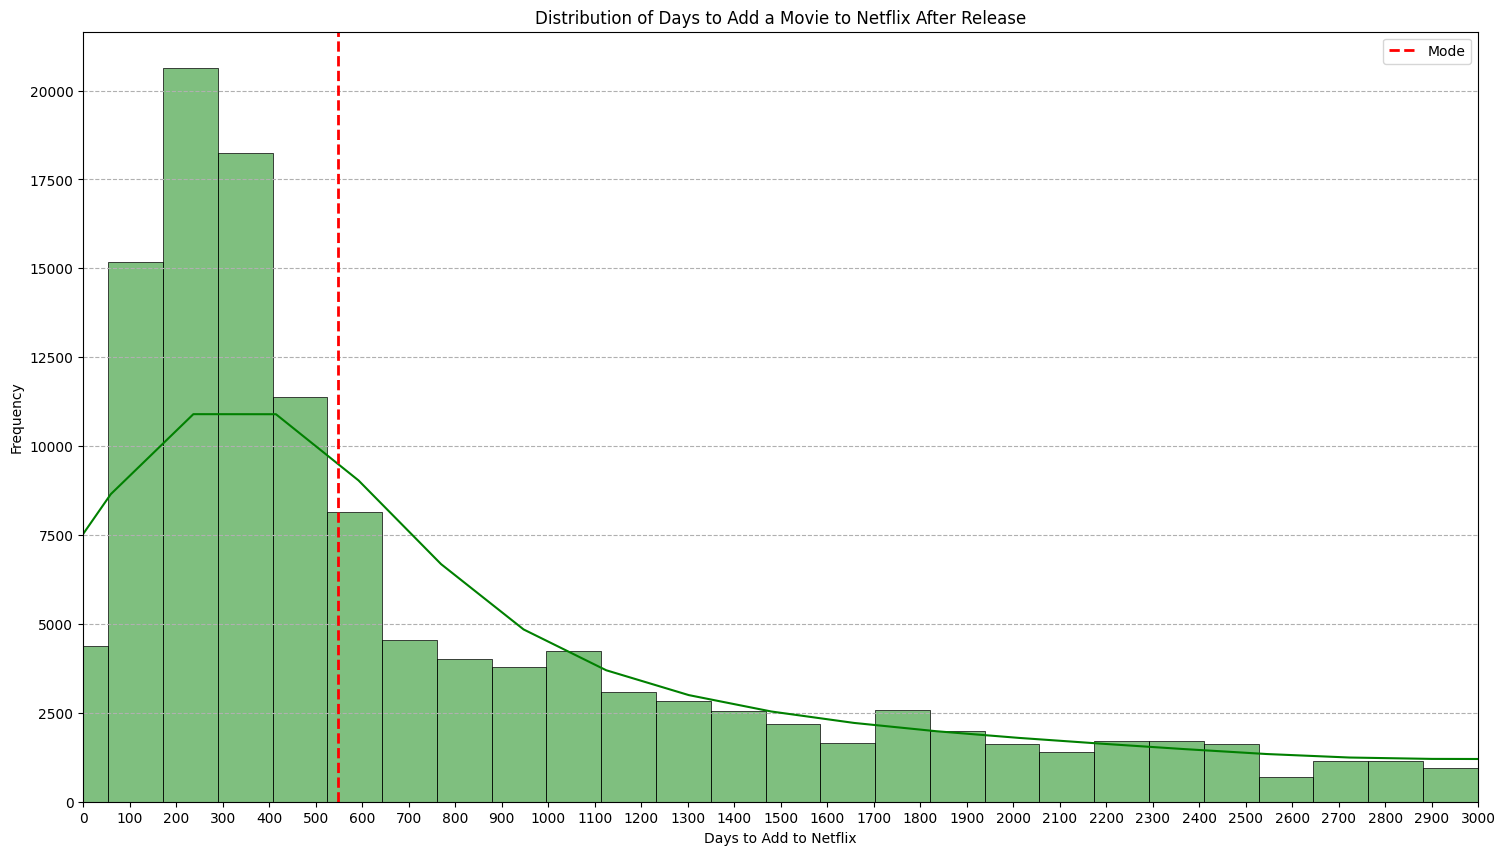

In [ ]:
# Plotting the kernel density plot and histogram
plt.figure(figsize=(18, 10))
sns.histplot(df['days_to_add'], bins=300, kde=True, color='green', edgecolor='black', linewidth=0.5)
plt.axvline(df['days_to_add'].mode().values[0], color='red', linestyle='dashed', linewidth=2, label='Mode')
plt.title('Distribution of Days to Add a Movie to Netflix After Release')
plt.xlabel('Days to Add to Netflix')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=1)
# Set x-axis ticks and limits for better readability
plt.xticks(range(0, 5000, 100))
plt.xlim(0, 3000)
plt.show()


The mode days to add a movie to Netflix after release is: 547.0 days

# **Conclusion and Recommendations:**

**Conclusion:**
Netflix dominates the OTT market with a significant share. Strategic changes are crucial for continued growth.
**Recommendations:**
1. Audience Expansion:Target the 12 to 17 age group for broader appeal.
2. Content Strategy:Increase focus on TV show production for sustained viewer engagement.Consider longer TV show seasons and extend
average movie duration to 2 hours.
3. Promoting Diversity:Support and promote emerging directors to enhance content diversity.
4. Global Reach:Collaborate with directors from untapped markets, such as China, for diverse content.
5. Genre Diversity:Explore additional genres and combinations based on audience preferences for future growth.